# WeatherPy

Analysis
- For positive latitudes, temperature drops when latitude increases; while for negative latitudes, temperature rises when latitude increases.
- There is no clear correlation between latitude of the city and wind speed. However, there are a few outliers showing that windspeed increased significantly at latitude over 60°.
- There is no clear relationship between humidity and latitude. Some of the cities with latitude between 0°-20° have lower humidity.
- There is no correlation between cloudiness and latitude.

In [3]:
!pip install citipy

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

574

In [6]:
cities

['airai',
 'hasaki',
 'zhigansk',
 'bredasdorp',
 'puerto ayora',
 'east london',
 'utiroa',
 'new norfolk',
 'verkh-usugli',
 'rikitea',
 'severo-kurilsk',
 'kaitangata',
 'saint-augustin',
 'pakokku',
 'dingzhou',
 'hermanus',
 'illoqqortoormiut',
 'necochea',
 'bilma',
 'hithadhoo',
 'okhotsk',
 'cidreira',
 'port lincoln',
 'kampot',
 'vestmannaeyjar',
 'eirunepe',
 'mataura',
 'hegang',
 'vardo',
 'esperance',
 'cape town',
 'yellowknife',
 'pevek',
 'forbes',
 'busselton',
 'san patricio',
 'samusu',
 'dabakala',
 'codrington',
 'butaritari',
 'pipri',
 'castro',
 'kracheh',
 'punta arenas',
 'buala',
 'kununurra',
 'albany',
 'kodiak',
 'hohhot',
 'chuy',
 'kapaa',
 'bathsheba',
 'ponta do sol',
 'ushuaia',
 'nanning',
 'college',
 'mahebourg',
 'norman wells',
 'hobart',
 'marsh harbour',
 'henties bay',
 'moyale',
 'ostrovnoy',
 'port elizabeth',
 'vysokogornyy',
 'mwingi',
 'ribeira grande',
 'barrow',
 'ust-donetskiy',
 'mys shmidta',
 'gallup',
 'vaini',
 'zeya',
 'port alf

## Perform API Calls
Perform a weather check on each city using a series of successive API calls.

Include a print log of each city as it'sbeing processed (with the city number and city name).

In [7]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

cityName = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxTemp =[]
windSpeed = []

count = 1
data_set = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

for city in cities:
    try:
        query_url = f"{base_url}appid={api_key}&units={units}&q="
        target_url = (query_url+city).format(city.replace(" ", "+"))
        response = requests.get(target_url).json()
        cityName.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response['wind']['speed'])
        print(f"Processing Record {count} of Set {data_set} | {response['name']}")
        count= count + 1
    except:
        print("City not found. Skipping...")
    if count == 51: 
        count = 0 
        data_set = data_set+1
        time.sleep(60)


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Airai
Processing Record 2 of Set 1 | Hasaki
Processing Record 3 of Set 1 | Zhigansk
Processing Record 4 of Set 1 | Bredasdorp
Processing Record 5 of Set 1 | Puerto Ayora
Processing Record 6 of Set 1 | East London
City not found. Skipping...
Processing Record 7 of Set 1 | New Norfolk
Processing Record 8 of Set 1 | Verkh-Usugli
Processing Record 9 of Set 1 | Rikitea
Processing Record 10 of Set 1 | Severo-Kuril'sk
Processing Record 11 of Set 1 | Kaitangata
Processing Record 12 of Set 1 | Saint-Augustin
Processing Record 13 of Set 1 | Pakokku
Processing Record 14 of Set 1 | Dingzhou
Processing Record 15 of Set 1 | Hermanus
City not found. Skipping...
Processing Record 16 of Set 1 | Necochea
Processing Record 17 of Set 1 | Bilma
Processing Record 18 of Set 1 | Hithadhoo
Processing Record 19 of Set 1 | Okhotsk
Processing Record 20 of Set 1 | Cidreira
Processing Record 21 of Set 1 | Port Lincoln
Processing R

Processing Record 33 of Set 4 | Vallenar
Processing Record 34 of Set 4 | Teguldet
Processing Record 35 of Set 4 | Nyurba
Processing Record 36 of Set 4 | Hofn
Processing Record 37 of Set 4 | Lorengau
Processing Record 38 of Set 4 | Bira
Processing Record 39 of Set 4 | Broken Hill
Processing Record 40 of Set 4 | Usinsk
Processing Record 41 of Set 4 | Bubaque
Processing Record 42 of Set 4 | Domoni
Processing Record 43 of Set 4 | Safaga
Processing Record 44 of Set 4 | Kuytun
Processing Record 45 of Set 4 | Kodinar
Processing Record 46 of Set 4 | Baruun-Urt
Processing Record 47 of Set 4 | Calabozo
Processing Record 48 of Set 4 | Sao Filipe
Processing Record 49 of Set 4 | Clyde River
Processing Record 50 of Set 4 | Nkowakowa
Processing Record 0 of Set 5 | Wahpeton
Processing Record 1 of Set 5 | Ulaangom
Processing Record 2 of Set 5 | Fortuna
Processing Record 3 of Set 5 | Avanuorri
Processing Record 4 of Set 5 | Bermejo
Processing Record 5 of Set 5 | Ponnampet
Processing Record 6 of Set 5 | 

Processing Record 17 of Set 8 | Ahipara
Processing Record 18 of Set 8 | Zyryanka
Processing Record 19 of Set 8 | Nishihara
Processing Record 20 of Set 8 | Soe
Processing Record 21 of Set 8 | Bonthe
Processing Record 22 of Set 8 | Kargasok
City not found. Skipping...
Processing Record 23 of Set 8 | Tazovsky
Processing Record 24 of Set 8 | Kopavogur
Processing Record 25 of Set 8 | Woodward
Processing Record 26 of Set 8 | Padang
Processing Record 27 of Set 8 | Palmas Bellas
Processing Record 28 of Set 8 | Nucsoara
Processing Record 29 of Set 8 | Pangnirtung
Processing Record 30 of Set 8 | Dekar
Processing Record 31 of Set 8 | Mount Gambier
Processing Record 32 of Set 8 | Porto-Novo
Processing Record 33 of Set 8 | Fort Nelson
Processing Record 34 of Set 8 | Sorocaba
Processing Record 35 of Set 8 | Adrar
Processing Record 36 of Set 8 | Ilo
Processing Record 37 of Set 8 | Coyhaique
Processing Record 38 of Set 8 | Touros
Processing Record 39 of Set 8 | Udachny
Processing Record 40 of Set 8 | 

In [8]:
weather_dict = {
    'City': cityName,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': maxTemp,
    'Wind Speed': windSpeed
}

weather_data = pd.DataFrame(weather_dict)


In [9]:
weather_data.to_csv('Output_Data/cities.csv', index=False)

In [10]:
weather_data.count()

City          527
Cloudiness    527
Country       527
Date          527
Humidity      527
Lat           527
Lng           527
Max Temp      527
Wind Speed    527
dtype: int64

In [11]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Airai,100,TL,1581475631,72,-8.93,125.41,78.37,4.09
1,Hasaki,20,JP,1581475631,46,35.73,140.83,55.00,8.05
2,Zhigansk,100,RU,1581475632,94,66.77,123.37,-14.42,11.54
3,Bredasdorp,1,ZA,1581475632,82,-34.53,20.04,68.00,12.75
4,Puerto Ayora,68,EC,1581475632,82,-0.74,-90.35,78.64,4.47


## Plotting the Data

#### Latitude vs. Temperature Plot

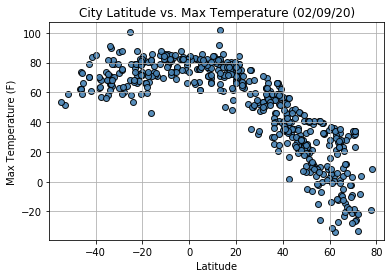

In [18]:
fig, ax = plt.subplots()
ax.scatter(weather_data['Lat'], weather_data['Max Temp'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.90);
ax.grid()
ax.set(title='City Latitude vs. Max Temperature (02/09/20)',xlabel='Latitude',ylabel='Max Temperature (F)',
       xlim=((weather_data['Lat']).min()-5, (weather_data['Lat']).max()+5),
       ylim = ((weather_data['Max Temp']).min()-5, (weather_data['Max Temp']).max()+5))
plt.show()

# Save the Figure
path = os.path.join("Images/Latitude-Temperature.png")
path
fig.savefig(path)


#### Latitude vs. Humidity Plot

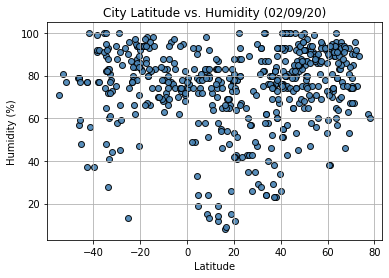

In [19]:
fig2, ax2 = plt.subplots()
ax2.scatter(weather_data['Lat'], weather_data['Humidity'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.90);
ax2.grid()
ax2.set(title='City Latitude vs. Humidity (02/09/20)',xlabel='Latitude',ylabel='Humidity (%)',
       xlim=((weather_data['Lat']).min()-5, (weather_data['Lat']).max()+5),
       ylim = ((weather_data['Humidity']).min()-5, (weather_data['Humidity']).max()+5))
plt.show()

# Save the Figure
path = os.path.join("Images/Latitude-Humidity.png")
path
fig2.savefig(path)


#### Latitude vs. Cloudiness Plot

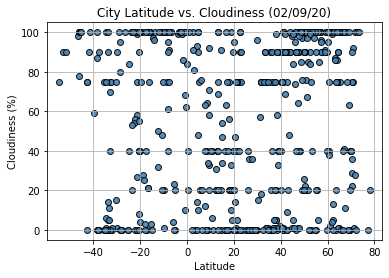

In [20]:
fig3, ax3 = plt.subplots()
ax3.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.90);
ax3.grid()
ax3.set(title='City Latitude vs. Cloudiness (02/09/20)',xlabel='Latitude',ylabel='Cloudiness (%)',
       xlim=((weather_data['Lat']).min()-5, (weather_data['Lat']).max()+5),
       ylim = ((weather_data['Cloudiness']).min()-5, (weather_data['Cloudiness']).max()+5))
plt.show()

# Save the Figure
path = os.path.join("Images/Latitude-Cloudiness.png")
path
fig3.savefig(path)


#### Latitude vs. Wind Speed Plot

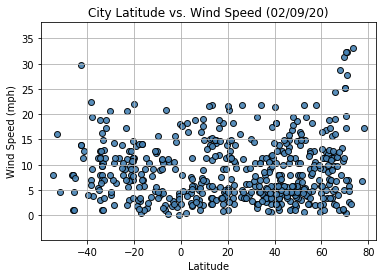

In [21]:
fig4, ax4 = plt.subplots()
ax4.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.90);
ax4.grid()
ax4.set(title='City Latitude vs. Wind Speed (02/09/20)',xlabel='Latitude',ylabel='Wind Speed (mph)',
       xlim=((weather_data['Lat']).min()-5, (weather_data['Lat']).max()+5),
       ylim = ((weather_data['Wind Speed']).min()-5, (weather_data['Wind Speed']).max()+5))
plt.show()

# Save the Figure
path = os.path.join("Images/Latitude-WindSpeed.png")
path
fig4.savefig(path)
